<a href="https://colab.research.google.com/github/bongcoy/RealTime-Trash-Detection/blob/main/Garbage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Persiapan
Install kaggle, import dataset

In [ ]:
!pip install -q kaggle
!pip install -U split_folders

In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!dir

garbage\ classification		     one-indexed-files-notrash_val.txt
Garbage\ classification		     one-indexed-files.txt
garbage-classification.zip	     output
kaggle.json			     sample_data
one-indexed-files-notrash_test.txt   zero-indexed-files.txt
one-indexed-files-notrash_train.txt


In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              233KB  2021-08-13 06:53:06          10624  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           6491  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2441  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2647  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [ ]:
!dir

garbage\ classification		     one-indexed-files-notrash_val.txt
Garbage\ classification		     one-indexed-files.txt
garbage-classification.zip	     output
kaggle.json			     sample_data
one-indexed-files-notrash_test.txt   zero-indexed-files.txt
one-indexed-files-notrash_train.txt


In [ ]:
!kaggle datasets download -d asdasdasasdas/garbage-classification

garbage-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip garbage-classification.zip

Archive:  garbage-classification.zip
replace Garbage classification/Garbage classification/cardboard/cardboard1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Gas

In [ ]:
!nvidia-smi

Sat Aug 14 06:34:31 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    31W /  70W |  14570MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 1. Import Lib

In [ ]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import splitfolders

## 2. Setting up File Locations and  Checking sample images

In [ ]:
pwd

'/content'

In [ ]:
splitfolders.ratio("/content/Garbage classification/Garbage classification", output="output", seed=1337, ratio=(0.6, 0.4))

Copying files: 2527 files [00:00, 7574.46 files/s]


In [ ]:
# setting the path and the labels list for classification of targets on the basis in human understandable form

train_dir = os.path.join('/content/output/train')
test_dir = os.path.join('/content/output/val')

labels = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [ ]:
# checking the size of data available to us for training out model

for label in labels:
    directory = os.path.join(train_dir, label)
    print("Images of label \"" + label + "\":\t", len(os.listdir(directory)))

Images of label "cardboard":	 241
Images of label "glass":	 300
Images of label "metal":	 246
Images of label "paper":	 356
Images of label "plastic":	 289
Images of label "trash":	 82


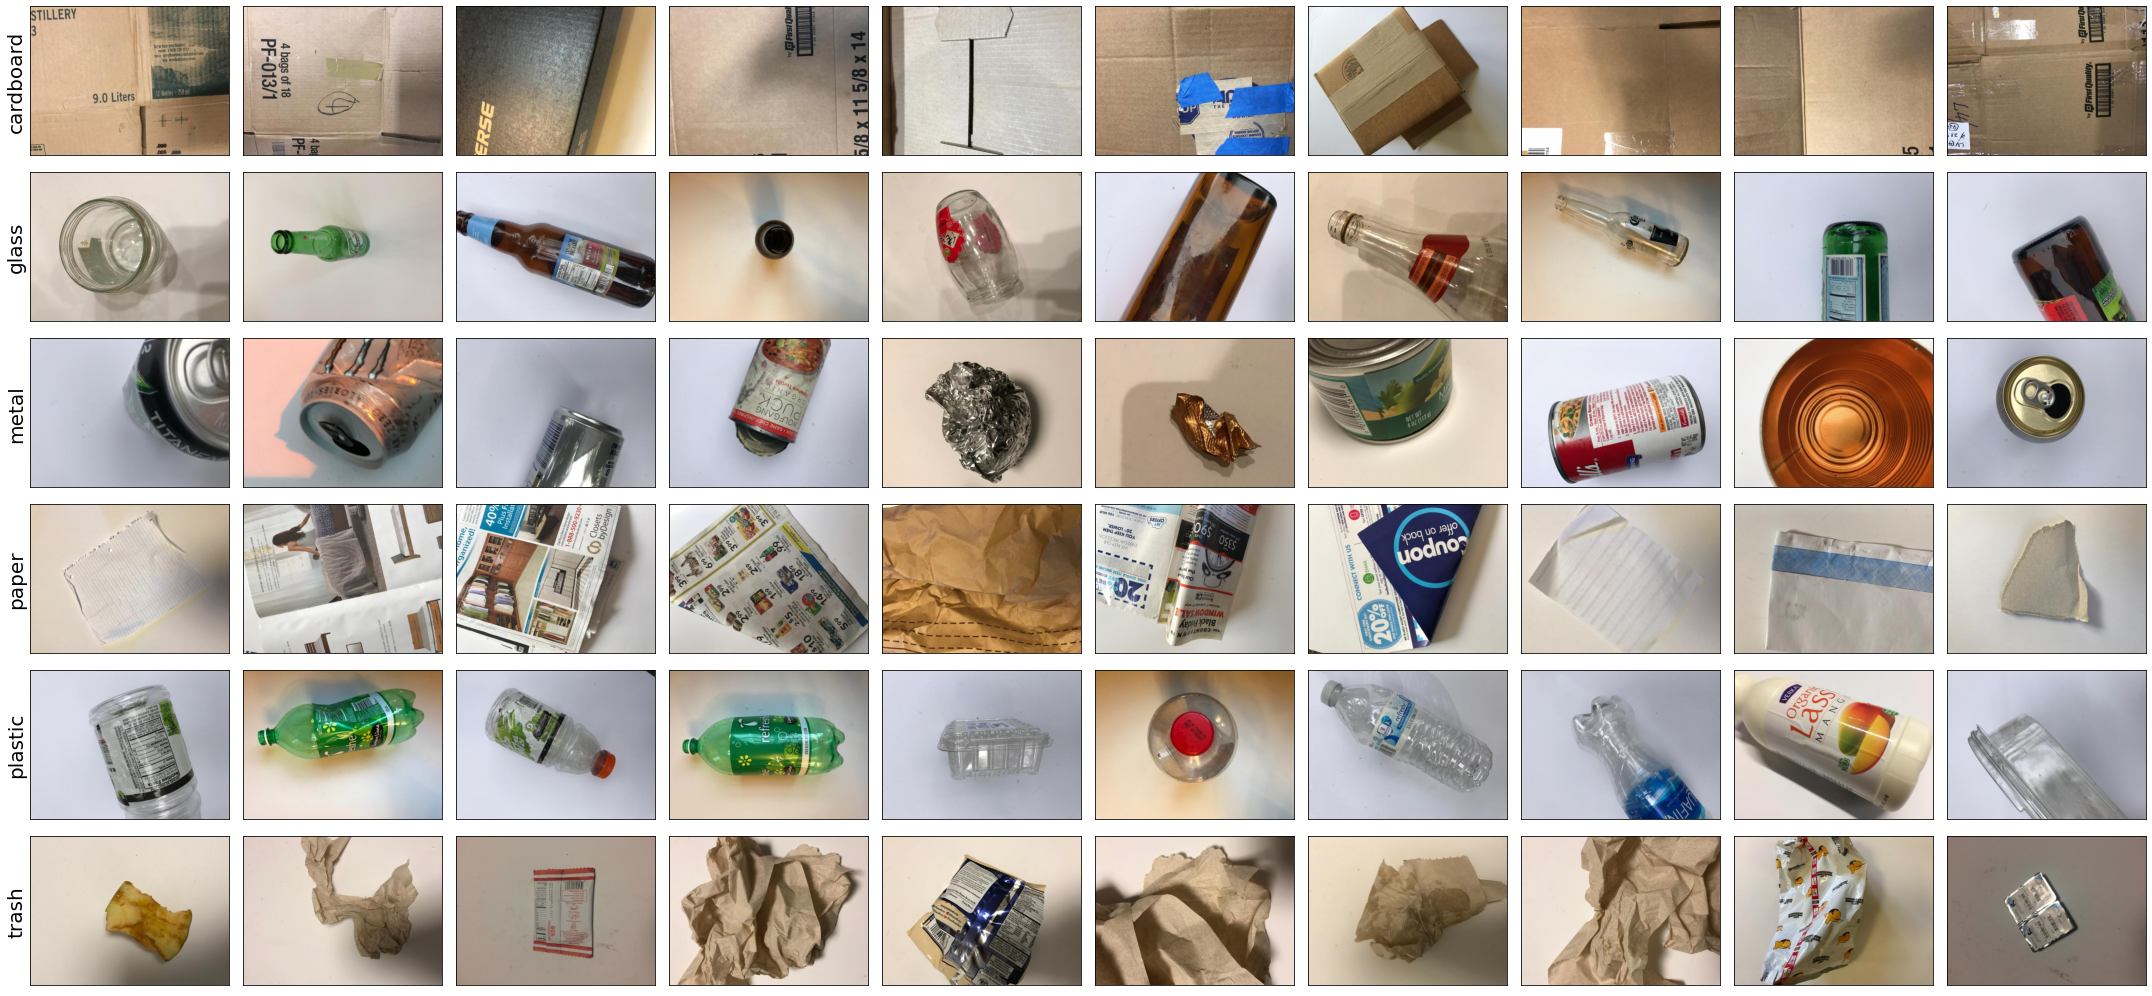

In [ ]:
# plotting images of different review for understanding the dataset

plt.figure(figsize=(30,14))

for i in range(6):
    directory = os.path.join(train_dir, labels[i])
    for j in range(10):
        path = os.path.join(directory, os.listdir(directory)[j])
        img = mpimg.imread(path)
        
        plt.subplot(6, 10, i*10 + j + 1)
        plt.imshow(img)
        
        if j == 0:
            plt.ylabel(labels[i], fontsize=20)
        
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
plt.tight_layout()
plt.show()

In [ ]:
# checking size of individual image

directory = os.path.join(train_dir, 'cardboard')
path = os.path.join(directory, os.listdir(directory)[0])
image = mpimg.imread(path)
image.shape

(384, 512, 3)

# Deep Learn

In [ ]:
# creating the model

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(384, 512, 3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),
    
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),
    
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),
    
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(6, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 382, 510, 32)      896       
_________________________________________________________________
batch_normalization_18 (Batc (None, 382, 510, 32)      128       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 380, 508, 32)      9248      
_________________________________________________________________
batch_normalization_19 (Batc (None, 380, 508, 32)      128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 190, 254, 32)      0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 190, 254, 32)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 188, 252, 64)     

In [ ]:
model.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer=keras.optimizers.Adam(learning_rate= 0.0001),
    metrics=['accuracy'])

In [ ]:
# creating generators for combining data and increasing the gainable insights by slightly modifying the images in the dataset

train_datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,
                                   rotation_range=15,zoom_range=0.1,
                                   width_shift_range=0.15,height_shift_range=0.15,
                                   shear_range=0.1,
                                   fill_mode="nearest",
                                   rescale=1./255., 
                                   validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(384, 512), 
                                                    batch_size=32, class_mode='binary', 
                                                    subset='training')
validation_generator = test_datagen.flow_from_directory(test_dir, target_size=(384, 512), 
                                                         batch_size=32, class_mode='binary', 
                                                         subset='validation')

Found 1213 images belonging to 7 classes.
Found 0 images belonging to 7 classes.


In [ ]:
# creating the callback function so that it can be used to end the training in case reached a good accuracy rate (above 90%)

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.90):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

In [ ]:
history = model.fit(train_generator, epochs=50, 
                    verbose=1, validation_data=validation_generator, 
                    callbacks=[callbacks])

Epoch 1/50
38/38 [==============================] - 68s 2s/step - loss: nan - accuracy: 0.0025 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/50
38/38 [==============================] - ETA: 0s - loss: nan - accuracy: 0.0000e+00

KeyboardInterrupt: ignored

# Menginput

In [ ]:
cat = int(input('Enter any category by index: '))
ind = int(input('Enter any index to test: '))

directory = os.path.join(train_dir, labels[cat % 6])
try:
    path = os.path.join(directory, os.listdir(directory)[ind])
    img = mpimg.imread(path)
    # line ini masih belom tau ditambahin apa (kemaren kata bang tiwa fotonya di scale dulu)
    x = keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images)
    pred = labels[np.argmax(classes)]
    
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.title('Actual: {}      Pred: {}'.format(labels[cat], pred))
    
except:
    print('Invalid Value')